Nama:

In [1]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

(1) Lanjutkan hasil transformasi train set dan test set dari hands-on 6



In [19]:
#memanggil data training set dan testing set yang telah ditransformasi pada hands on 6
X_train_transformed = pd.read_csv('X_train_transformed.csv').drop(['Unnamed: 0', 'Applicant_ID'], axis=1)
X_test_transformed = pd.read_csv('X_test_transformed.csv').drop(['Unnamed: 0', 'Applicant_ID'], axis=1)
y_train = pd.read_csv('y_train.csv').drop('Unnamed: 0', axis=1)['Status']
y_test = pd.read_csv('y_test.csv').drop('Unnamed: 0', axis=1)['Status']

(2) Buat 2 model: AdaBoost default dan Adaboost optimized. Lakukan cross-validation dengan estimator AdaBoost dengan untuk menentukan nilai optimal untuk hyperparameter n_estimators. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [21]:
#AdaBoost default
ada = AdaBoostClassifier()
ada.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [51]:
#fungsi untuk menampilkan classification report
def classif(x, y, estimator):
    y_pred = estimator.predict(x)
    print(classification_report(y, y_pred, labels = [1,0]))

def classif_lr(x, y, estimator, th):
    y_pred = estimator.predict_proba(x)[:,1] > th
    print(classification_report(y, y_pred, labels = [1,0]))

In [24]:
#classification report untuk AdaBoost default
classif(X_train_transformed, y_train, ada)
classif(X_test_transformed, y_test, ada)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      1.00      1.00        97

    accuracy                           1.00     20102
   macro avg       1.00      1.00      1.00     20102
weighted avg       1.00      1.00      1.00     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       0.95      0.88      0.91        24

    accuracy                           1.00      5026
   macro avg       0.98      0.94      0.96      5026
weighted avg       1.00      1.00      1.00      5026



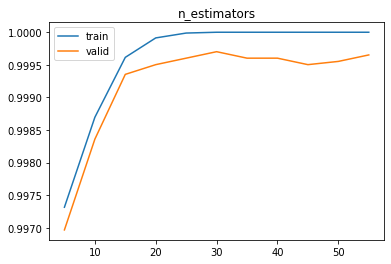

30

In [26]:
#tuning hyperparameter untuk AdaBoost optimized
params = np.arange(5,60,5)
train = []
valid = []

for par in params:
    ada_opt = AdaBoostClassifier(random_state=42, n_estimators=par)
    result = cross_validate(ada_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('n_estimators')
plt.show()
n_est_fin_ada = params[np.argmax(valid)]
n_est_fin_ada

In [27]:
ada_optimized = AdaBoostClassifier(n_estimators=n_est_fin_ada)
ada_optimized.fit(X_train_transformed, y_train)

AdaBoostClassifier(n_estimators=30)

In [30]:
classif(X_train_transformed, y_train, ada_optimized)
classif(X_test_transformed, y_test, ada_optimized)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      1.00      1.00        97

    accuracy                           1.00     20102
   macro avg       1.00      1.00      1.00     20102
weighted avg       1.00      1.00      1.00     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       0.96      0.92      0.94        24

    accuracy                           1.00      5026
   macro avg       0.98      0.96      0.97      5026
weighted avg       1.00      1.00      1.00      5026



Optimasi parameter n_estimators meningkatkan performa (mengurangi overfit)

(3) Buat 2 model: XGBoost default dan XGBoost optimized. Lakukan cross-validation dengan estimator XGBoost dengan untuk menentukan nilai optimal untuk hyperparameter n_estimators, learning_rate, max_depth, gamma, reg_lambda, min_child_weight. Print classification report untuk trainset dan testset (default vs optimized). Apakah optimisasi meningkatkan performansi dari model?

In [31]:
#xgboost default
xgb_def = XGBClassifier()
xgb_def.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
#classification report untuk XGBoost Default (tanpa tuning)
classif(X_train_transformed, y_train, xgb_def)
classif(X_test_transformed, y_test, xgb_def)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      1.00      1.00        97

    accuracy                           1.00     20102
   macro avg       1.00      1.00      1.00     20102
weighted avg       1.00      1.00      1.00     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       0.95      0.88      0.91        24

    accuracy                           1.00      5026
   macro avg       0.98      0.94      0.96      5026
weighted avg       1.00      1.00      1.00      5026



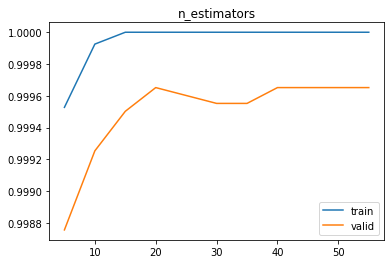

40

In [35]:
#tuning hyperparameter unuk XGBoost optimized
params = np.arange(5,60,5)
train = []
valid = []

for par in params:
    xgb_opt = XGBClassifier(random_state=42, n_estimators=par)
    result = cross_validate(xgb_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('n_estimators')
plt.show()
n_est_fin_xg = params[np.argmax(valid)]
n_est_fin_xg

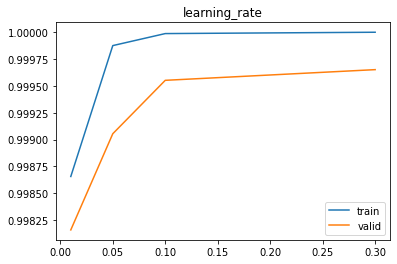

0.3

In [38]:
params = [0.01, 0.05, 0.1, 0.3]
train = []
valid = []

for par in params:
    xgb_opt = XGBClassifier(random_state=42, n_estimators=n_est_fin_xg, learning_rate=par)
    result = cross_validate(xgb_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('learning_rate')
plt.show()
lr_fin_xg = params[np.argmax(valid)]
lr_fin_xg

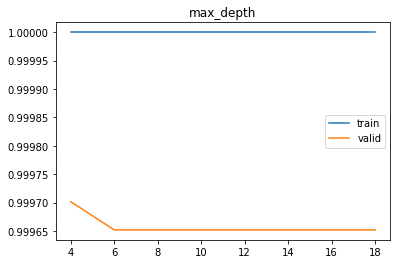

4

In [39]:
params = np.arange(4, 20, 2)
train = []
valid = []

for par in params:
    xgb_opt = XGBClassifier(random_state=42, n_estimators=n_est_fin_xg, learning_rate=lr_fin_xg, max_depth=par)
    result = cross_validate(xgb_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('max_depth')
plt.show()
md_fin_xg = params[np.argmax(valid)]
md_fin_xg

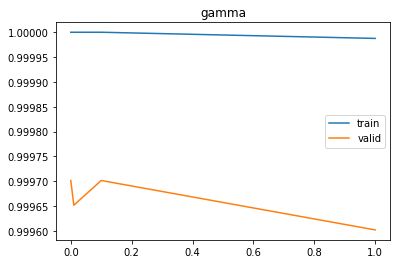

0

In [40]:
params = [0, 0.01, 0.1, 1]
train = []
valid = []

for par in params:
    xgb_opt = XGBClassifier(random_state=42, n_estimators=n_est_fin_xg, learning_rate=lr_fin_xg, max_depth=md_fin_xg,
    gamma=par)
    result = cross_validate(xgb_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('gamma')
plt.show()
gamma_fin_xg = params[np.argmax(valid)]
gamma_fin_xg

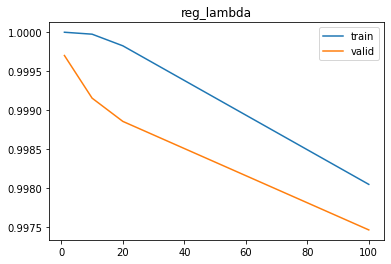

1

In [41]:
params = [1, 10, 20, 100]
train = []
valid = []

for par in params:
    xgb_opt = XGBClassifier(random_state=42, n_estimators=n_est_fin_xg, learning_rate=lr_fin_xg, max_depth=md_fin_xg,
    gamma=gamma_fin_xg, reg_lambda = par)
    result = cross_validate(xgb_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('reg_lambda')
plt.show()
regl_fin_xg = params[np.argmax(valid)]
regl_fin_xg

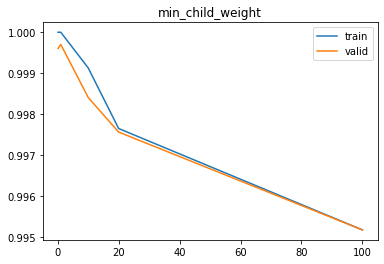

1

In [42]:
params = [0.1, 0.5, 1, 10, 20, 100]
train = []
valid = []

for par in params:
    xgb_opt = XGBClassifier(random_state=42, n_estimators=n_est_fin_xg, learning_rate=lr_fin_xg, max_depth=md_fin_xg,
    gamma=gamma_fin_xg, reg_lambda = regl_fin_xg, min_child_weight = par)
    result = cross_validate(xgb_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('min_child_weight')
plt.show()
mcw_fin_xg = params[np.argmax(valid)]
mcw_fin_xg

In [43]:
#XGBoost optimized
xgb_opt = XGBClassifier(random_state=42, n_estimators=n_est_fin_xg, learning_rate=lr_fin_xg, max_depth=md_fin_xg,
    gamma=gamma_fin_xg, reg_lambda = regl_fin_xg, min_child_weight = mcw_fin_xg)
xgb_opt.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
classif(X_train_transformed, y_train, xgb_opt)
classif(X_test_transformed, y_test, xgb_opt)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20005
           0       1.00      1.00      1.00        97

    accuracy                           1.00     20102
   macro avg       1.00      1.00      1.00     20102
weighted avg       1.00      1.00      1.00     20102

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5002
           0       0.95      0.88      0.91        24

    accuracy                           1.00      5026
   macro avg       0.98      0.94      0.96      5026
weighted avg       1.00      1.00      1.00      5026



Berdasarkan nilai recall dan precisionnya, optimisasi tidak meningkatkan performa

(4) Buat model VotingClassifier berisi 3 model: LogisticRegression, RandomForestClassifier, dan XGBClassifier. Voting bebas pakai 'hard' atau 'soft. Tampilkan performance model ini terhadap training set dan testing set.

In [45]:
# model logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

LogisticRegression()

In [46]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [50]:
voting = VotingClassifier([('logreg', logreg), ('rf', rf), ('xgb', xgb_opt)], voting = 'soft')
voting.fit(X_train_transformed, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.3, max_bin=256,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=4,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=40, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=42,
                                            reg_alpha=0, reg_lambda=1, ...))],
                 voting='soft')

In [66]:
def perform(X, actual, est):
    TP = 0
    FN = 0
    TN = 0
    FP = 0

    actual = actual.reset_index(drop=True)
    predicted = est.predict(X)

    for i in range(len(actual)):
        if actual[i] == 0:
            if predicted[i] == 0:
                TN += 1
            else:
                FP += 1
        else:
            if predicted[i] == 1:
                TP += 1
            else:
                FN += 1

    recall = TP/(TP+FN)

    TNR = TN/(TN+FP)


    if TP + FP != 0:
        precision = TP/(TP+FP)
    else:
        precision = 'none'

    if TN + FN != 0:
        NPV = TN/(TN+FN)
    else:
        NPV = 'none'

    acc = (TP+TN)/(len(actual))

    f1 = 2*recall*precision/(recall+precision)

    return recall, precision, TNR, NPV, f1, acc

In [67]:
#fungsi untuk menampilkan performa model
def perf_df(X_train, y_train, X_test, y_test, model_list, label_list):
    perf_dict = {'recall':{},
                'precision':{},
                'TNR':{},
                'NPV':{},
                'accuracy':{},
                'f1':{}}

    for x,y in zip(model_list,label_list):
        recall, precision, TNR, NPV, f1, acc = perform(X_train, y_train, x)
        suffix='_train'
        perf_dict['recall'][y+suffix] = recall
        perf_dict['precision'][y+suffix] = precision
        perf_dict['TNR'][y+suffix] = TNR
        perf_dict['NPV'][y+suffix] = NPV
        perf_dict['accuracy'][y+suffix] = f1
        perf_dict['f1'][y+suffix] = acc

    for x,y in zip(model_list,label_list):
        recall, precision, TNR, NPV, f1, acc = perform(X_test, y_test, x)
        suffix='_test'
        perf_dict['recall'][y+suffix] = recall
        perf_dict['precision'][y+suffix] = precision
        perf_dict['TNR'][y+suffix] = TNR
        perf_dict['NPV'][y+suffix] = NPV
        perf_dict['accuracy'][y+suffix] = f1
        perf_dict['f1'][y+suffix] = acc

    print(pd.DataFrame(perf_dict).sort_index())

In [70]:
model_list = [logreg, rf, xgb_opt, voting]
label_list = ['logreg', 'rf', 'xgb_opt', 'voting']

In [71]:
perf_df(X_train_transformed, y_train, X_test_transformed, y_test, model_list, label_list)

               recall  precision       TNR       NPV  accuracy        f1
logreg_test    1.0000   0.995819  0.125000  1.000000  0.997905  0.995822
logreg_train   1.0000   0.995769  0.123711  1.000000  0.997880  0.995772
rf_test        0.9998   0.997407  0.458333  0.916667  0.998602  0.997214
rf_train       1.0000   1.000000  1.000000  1.000000  1.000000  1.000000
voting_test    1.0000   0.998005  0.583333  1.000000  0.999001  0.998010
voting_train   1.0000   0.999950  0.989691  1.000000  0.999975  0.999950
xgb_opt_test   0.9998   0.999400  0.875000  0.954545  0.999600  0.999204
xgb_opt_train  1.0000   1.000000  1.000000  1.000000  1.000000  1.000000


(5) Buat model StackingClassifier dengan model level 1: LogisticRegression, RandomForestClassifier, dan XGBClassifier. Gunkan LogisticRegression sebagai final estimator. Tampilkan performance model ini terhadap training set dan testing set.

In [72]:
stack = StackingClassifier(estimators = [('logreg', logreg), ('rf', rf), ('xgb', xgb_opt)], final_estimator= LogisticRegression()) 
stack.fit(X_train_transformed, y_train)

StackingClassifier(estimators=[('logreg', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.3, max_bin=256,
                                              max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=4,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=40, n_jobs=0,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=42,
                                              reg_alpha=0, reg_lambda=1, ...))],
                   final_estimator=LogisticRegression())

In [73]:
model_list = [logreg, rf, xgb_opt, voting, stack]
label_list = ['logreg', 'rf', 'xgb_opt', 'voting', 'stack']

In [74]:
perf_df(X_train_transformed, y_train, X_test_transformed, y_test, model_list, label_list)

               recall  precision       TNR       NPV  accuracy        f1
logreg_test    1.0000   0.995819  0.125000  1.000000  0.997905  0.995822
logreg_train   1.0000   0.995769  0.123711  1.000000  0.997880  0.995772
rf_test        0.9998   0.997407  0.458333  0.916667  0.998602  0.997214
rf_train       1.0000   1.000000  1.000000  1.000000  1.000000  1.000000
stack_test     0.9998   0.999201  0.833333  0.952381  0.999500  0.999005
stack_train    1.0000   1.000000  1.000000  1.000000  1.000000  1.000000
voting_test    1.0000   0.998005  0.583333  1.000000  0.999001  0.998010
voting_train   1.0000   0.999950  0.989691  1.000000  0.999975  0.999950
xgb_opt_test   0.9998   0.999400  0.875000  0.954545  0.999600  0.999204
xgb_opt_train  1.0000   1.000000  1.000000  1.000000  1.000000  1.000000


(6) Dari hasil performansi yang Anda dapatkan pada tugas ini dan tugas sebelumnya, manakah estimator yang cocok untuk dataset ini? Apa alasannya?

Berdasarkan nilai precision dan recall dari setiap model, stacking classifier diperkirakan menjadi estimator yang cocok untuk dataset cc_application